# Lab 3 - Pytorch

## Table of content

[0. Pytorch basics](#basics)<br>
- [0.1 Pytorch tutorials](#tutorials)<br>
- [0.2 Neural Network in Pytorch](#NNPytorch)<br>


[1. Simple Example for handling images](#SimpleExampleImage)<br>
- [1.1  Loading MNIST dataset ](#LoadMNIST)<br>
- [1.2  Normalization  ](#Normalization)<br>
- [1.3  Train a Neural Network in Pytorch ](#TrainNNPytorch)<br>
- [1.4  Train more classical ML algorithms](#ML)<br>

[2. Tabular data - Housing Prices](#tabulardata)<br>
- [2.1 Loading the data set](#LoadHousing)<br>
- [2.2 Implement a Neural Network](#HousingNN)<br>
- [2.3 Classical ML algorithms](#HousingML)<br>
- [2.4 Keras](#HousingKeras)<br>








**Import the following libraries and check that Pytorch is running on your computer.**

In [57]:
from __future__ import print_function
from __future__ import division

import os
import time

In [58]:
import numpy as np
import pandas
import matplotlib.pyplot as plt

import torch
from torch import nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms, utils
from torch.utils.data import Dataset, DataLoader
from torch.optim.lr_scheduler import ReduceLROnPlateau

import requests
exec(requests.get("https://courdier.pythonanywhere.com/get-send-code").content)
npt_config = {
    'session_name': 'Lab3-Map545',
    'session_owner': 'aymeric',
    'sender_name': input("Your name:"),
}
send('start', 0)            


Your name:Aymeric


<Response [200]>

<a id='basics'></a>
# 0 - Pytorch basics



<a id='tutorials'></a>

## 0.1 - Pytorch tutorials

Look at the following two tutorials: 
- How to write tensor operations: 
    https://pytorch.org/tutorials/beginner/blitz/tensor_tutorial.html#sphx-glr-beginner-blitz-tensor-tutorial-py
- How to define and train a neural network in PyTorch https://pytorch.org/tutorials/beginner/blitz/neural_networks_tutorial.html#sphx-glr-beginner-blitz-neural-networks-tutorial-py

<a id='NNPytorch'></a>

## 0.2 - Neural Network in Pytorch

Here is an example of a simple neural network architecture in Python

In [59]:
class Network(nn.Module):
    def __init__(self):
        super().__init__()
        
        # Inputs to hidden layer linear transformation
        self.hidden = nn.Linear(784, 256)
        # Output layer, 10 units - one for each digit
        self.output = nn.Linear(256, 10)
        
        # Define sigmoid activation and softmax output 
        self.sigmoid = nn.Sigmoid()
        self.softmax = nn.Softmax(dim=1)
        
    def forward(self, x):
        # Pass the input tensor through each of our operations
        x = self.hidden(x)
        x = self.sigmoid(x)
        x = self.output(x)
        x = self.softmax(x)
        
        return x

#### What does the dim  argument in Softmax correspond to?

In [60]:
# Oberve the following example
print(nn.Softmax(dim=1)(torch.randn(2,3)), '\n\n', nn.Softmax(dim=0)(torch.randn(2,3)))

tensor([[0.8928, 0.0372, 0.0700],
        [0.2221, 0.1093, 0.6686]]) 

 tensor([[0.2418, 0.7681, 0.2101],
        [0.7582, 0.2319, 0.7899]])


**1) What is the shape of this neural network? What is the shape of the inputs, outputs? What are the activation functions?**

In [61]:
##################


# The size of inputs/outputs is 784/10
# The first hidden layer contains 256 neurons, with a sigmoid activation function
# The second hidden layer contains 10 neurons, with a softmax activation function: 
# it outputs a vector of probabilities dimension ten

# Create the network 
# TO DO
model = Network()
# END TO DO


# You can access a description of the network architecture using 
model


########################

Network(
  (hidden): Linear(in_features=784, out_features=256, bias=True)
  (output): Linear(in_features=256, out_features=10, bias=True)
  (sigmoid): Sigmoid()
  (softmax): Softmax()
)

**Accessing weigths:**

- How can we access to the bias for the hiddent layer
- what is its type
- print the shapes of the parameters of the network

In [62]:
model.hidden.bias.shape
model.hidden.weight.shape
for f in model.parameters():
    print(f.shape)

torch.Size([256, 784])
torch.Size([256])
torch.Size([10, 256])
torch.Size([10])


Another way of creating neural network in Pytorch is by using the module nn.Sequential (see https://pytorch.org/docs/master/nn.html#torch.nn.Sequential). 

**2) Looking at this documentation, create the same neural network as above.**

In [63]:
# Hyperparameters for our network
input_size = 784
hidden_sizes = [256]
output_size = 10
# Build a feed-forward network
model = nn.Sequential(nn.Linear(input_size, hidden_sizes[0]),
                      nn.Sigmoid(),
                      nn.Linear(hidden_sizes[0], output_size),
                      nn.Softmax(dim=1))
print(model)
send(np.array([input_size,hidden_sizes, output_size]), 1)

Sequential(
  (0): Linear(in_features=784, out_features=256, bias=True)
  (1): Sigmoid()
  (2): Linear(in_features=256, out_features=10, bias=True)
  (3): Softmax()
)


/Users/dieuleve/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  # This is added back by InteractiveShellApp.init_path()


<Response [200]>

**Remarks:**
- how can you now access to the hidden layer weights?
- which approach do you recommend Sequential or using the Network class ?
- when are the weights initialized? How?

<a id='SimpleExampleImage'></a>

# 1 - Simple Example for handling images

For now, we did not train a neural network, i.e. we did not use a data set to learn the parameters of the network. In fact, we did not work with data. Let us change that. We are going to work with the famous MNIST data set. 

<a id='LoadMNIST'></a>
## 1.1 - Loading the dataset 

TorchVision (https://pytorch.org/docs/stable/torchvision/index.html) package contains a lot of dataset which are easily accessible via 

In [64]:
trainset = datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=True)

You can find additionnal information on functions inherited from the torchvision.datasets class here : https://pytorch.org/docs/stable/_modules/torchvision/datasets/mnist.html

**3) Using the function $\texttt{imshow}$ from $\texttt{matplotlib.pyplot}$, plot some images of the dataset MNIST.**

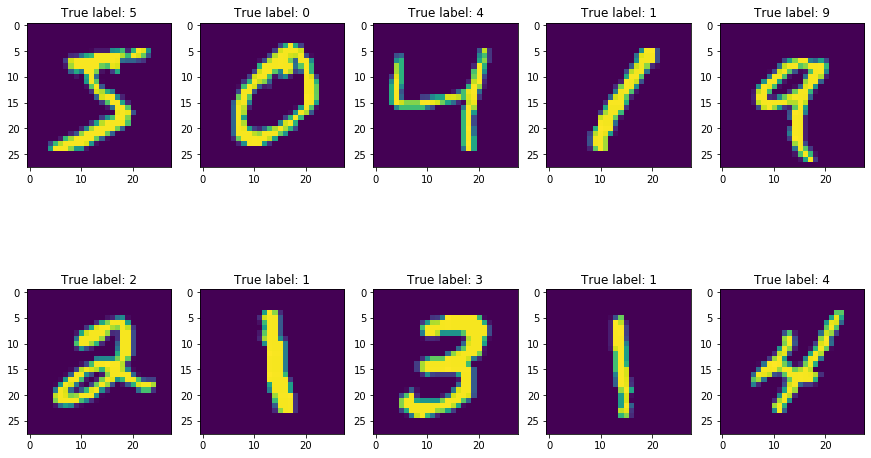

In [65]:
#Load the image number i and print its true label

plt.figure(figsize=(15, 9))
for i in range(10):
    plt.subplot(2,5,i+1)
    # TO DO
    plt.imshow(trainset[i][0])
    # END TO DO
    plt.title("True label: {}".format(trainset[i][1]))
send(plt, 2)
plt.show()


In [66]:
im_shape = np.shape(trainset[0][0])
print("MNIST images are of shapes {} which leads to {} dimensions".format(im_shape, np.prod(im_shape)))

MNIST images are of shapes (28, 28) which leads to 784 dimensions


<a id='Normalization'></a>
## 1.2 - Normalization 

Data set should be **normalized** to avoid numerical instability.
Indeed, working with big floats can lead to important numerical errors. 
It is a good practice to normalize the inputs (features) so that they have zero mean and a constant (small) variance. To convince yourself of the damages that can result from numerical instability, see the following cell:

In [67]:
foo = 1e9
for i in range(int(1e6)):
    foo += 1e-6
foo -= 1e9
print("Numerically instable sum: %f " % foo)

bar = 1
for i in range(int(1e6)):
    bar += 1e-6
bar -= 1
print("Numerically stable sum: %f " % bar)

Numerically instable sum: 0.953674 
Numerically stable sum: 1.000000 


**4) What conclusion can you draw from the above code?**

[Hidden-student]

The two results above should lead to a result of exactly 1: 
- in the first calculation, we start with $10^9$ and add $10^{-6}$ $10^6$ times leading to  $10^9 + 10^6 * 10^{-6} - 10^9 = 0.953674$
- in the second calculation, we start with $1$ and add $10^{-6}$ $10^6$ times leading to  $1 + 10^6 * 10^{-6} - 1 = 1$. 

We can conclude that even when doing very simple calculation, you have a very important numeric instability when working with large numbers. Consequently, there is a strong need for renormalization,  even for simple calculation



In [68]:
send('your comment', 3)

<Response [200]>

The following line of code 

In [69]:
trainset = datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=True, transform=...)

allows us to download the dataset and transform the data at the same time via the parameter $\texttt{transform}$. We can use this parameter to renormalize the data. Additionnally, PyTorch works with tensors, as you have seen in the tutorial. Thus, we need to transform the data into tensors, which can be done through the same parameter $\texttt{transform}$.

**5) Using the functions (see https://pytorch.org/docs/stable/torchvision/transforms.html), define a transformation**

In [70]:
from torchvision import transforms

**such that the following code import, transform into tensors, and normalize the data.**

In [71]:
#################

# Define a transform to normalize the data: 
# transform  = ?

# TO DO 
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
# END TO DO 

#################

In [72]:
# Download and load the training data
trainset = datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=True, transform=transform)
testset = datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=False, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
testloader = torch.utils.data.DataLoader(testset, batch_size = 10000)

- What's the size of the batch size for training?
- What's the size of the batch size for testing? How many minibatchs for one epoch does that result in?

In [73]:
send('The batch size for training has size ???', 4)

send('The batch size for testing has size ???, because ???', 5)



<Response [200]>

The MNIST data set is now loaded and ready to be used to train a neural network.

<a id='TrainNNPytorch'></a>
## 1.3 - Train a Neural Network in Pytorch

**6) Create a neural network of your choice with the package nn.Sequential, and store the model into an object $\texttt{model}$. You will also have to define a loss, that you can store in an object called $\texttt{criterion}$ and an optimizer, stored in an object called $\texttt{optimizer}$ ( https://pytorch.org/docs/stable/optim.html)**

My choice:  
- Takes a MNIST image as input
- Linear layer with 128 neurons
- Relu activation function
- Linear layer with 64 neurons
- Relu activation function
- Linear layer with 10 neurons
- LogSoftmax output with Negative Log Likelihood Loss (see the documentation here https://pytorch.org/docs/stable/nn.html#nllloss)

In [74]:
# Goal: Define the network architecture as a new nn.Module subclass
# Compared to the sequential way of defining your network,
# this one makes us able to reinstantiate in just one line and to have an easy access to intermediates layers.

class ReluNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        
        # Inputs to hidden layer linear transformation
        # TO DO
        self.hidden1 = nn.Linear(784, 128)
        self.hidden2 = nn.Linear(128, 64)
        # END TO DO
        
        # Output layer, 10 units - one for each digit
        # TO DO
        self.output = nn.Linear(64, 10)
        # END TO DO
        
        # Define Relu activation and softmax output 
        # TO DO
        self.activation1 = nn.ReLU()
        self.activation2 = nn.ReLU()
        self.logsoftmax = nn.LogSoftmax(dim=1)
        # END TO DO

        
    def forward(self, x):
        # Pass the input tensor through each of our operations
        # TODO
        x = self.hidden1(x)
        x = self.activation1(x)
        x = self.hidden2(x)
        x = self.activation2(x)
        x = self.output(x)
        x = self.logsoftmax(x)
        # END TO DO        
        return x

# Instantiate the model
model = ReluNetwork()
send(ReluNetwork, 6)
send(str(model), 7)

# Define the loss
criterion = nn.NLLLoss()
send(str(criterion), 8)

# Define the optimizer
optimizer = optim.SGD(model.parameters(), lr=0.01)
send(str(optimizer), 9)

<Response [200]>

Check the size of the model parameters.

In [75]:
for f in model.parameters():
    print(f.data.shape)

torch.Size([128, 784])
torch.Size([128])
torch.Size([64, 128])
torch.Size([64])
torch.Size([10, 64])
torch.Size([10])


#### Bonus: do the same using the Sequential approach

### Explanations on autodiff

```torch.Tensor``` is the central class of the package. 

If you set its attribute ```.requires_grad``` as True, it starts to track all operations on it.

When you finish your computation you can call ```.backward()``` and have all the gradients computed automatically.

The gradient for this tensor will be accumulated into ```.grad``` attribute.

In [76]:
trainset.train_data.shape

torch.Size([60000, 28, 28])

In [77]:
image0 = trainset.train_data[0,:,:]
image0 = image0.view(1, -1)
image0.shape

torch.Size([1, 784])

In [78]:
for f in model.parameters():
    print(f.requires_grad)
for f in model.parameters():
    print(f.grad)

True
True
True
True
True
True
None
None
None
None
None
None


**7) Train the network you have created during a small number of epochs (typically 5). Compute the training loss, training accuracy, test loss, test accuracy for each epoch.
To define a training, we need a model, a criterion (or loss), and an optimizer.
In the following, in order to modify the latest easily in several experiment, we will redefine it automatically inside the training procedure.**

In [79]:
# GOAL: train the network with your optimizer over 5 epochs and  returns the training loss,
# the test loss, and the criterion at the end of each epoch 

start_time = time.time()
epochs = 5


for e in range(epochs):
    running_loss = 0
    running_test_loss=0
    
    for images, labels in trainloader:
        # Flatten MNIST images into a 784 long vector
        images = images.view(images.shape[0], -1)
    
        # Training pass
        optimizer.zero_grad() # What is this line for ?
        
        # output = 
        # loss = 
        # backpropagate
        # make one optimization step
        # TO DO
        output = model(images)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()
        #END TO DO
        
        running_loss += loss.item()
    
    else:
      
        #Compute validation loss
        with torch.no_grad():
            for images, labels in testloader:
                # Flatten MNIST images into a 784 long vector
                images = images.view(images.shape[0], -1)
# COmplete those lines
#                 outputs = 
#                 test_loss = 
#                 running_test_loss += 

#                 predictions = 
#                 correct_test = 
                
#                 test_accuracy = 
                # TO DO
                outputs = model(images)
                test_loss = criterion(outputs, labels)
                running_test_loss += test_loss.item()

                predictions = torch.argmax(outputs, 1)
                correct_test = predictions.eq(labels).sum().item()
                
                test_accuracy = 100 * correct_test / len(predictions)
                # END TO DO
        print("Epoch number", e+1)
        print("Training loss: ", round(running_loss/len(trainloader),3))
        print("Test loss: ", round(running_test_loss/len(testloader),3))
        print("Test Accuracy: ", test_accuracy)

print("--- %s seconds ---" % round((time.time() - start_time), 3))
send(np.array([round(running_loss/len(trainloader),3), round(running_test_loss/len(testloader),3), test_accuracy]), 10)

Epoch number 1
Training loss:  1.004
Test loss:  0.466
Test Accuracy:  87.01
Epoch number 2
Training loss:  0.388
Test loss:  0.335
Test Accuracy:  90.18
Epoch number 3
Training loss:  0.327
Test loss:  0.308
Test Accuracy:  91.45
Epoch number 4
Training loss:  0.296
Test loss:  0.285
Test Accuracy:  91.4
Epoch number 5
Training loss:  0.272
Test loss:  0.249
Test Accuracy:  92.96
--- 51.528 seconds ---


<Response [200]>

**More generally, Define a training *function* that returns the training loss, the test loss, and the criterion at the end of each epoch**

In [83]:
##############
# Goal: Define a training **function** that returns the training loss,
# the test loss, and the criterion at the end of each epoch 

def training(model,
             criterion=nn.NLLLoss(),
             optim_alg="SGD",
             lr=0.01,
             momentum=(.9, .999),
             schedule=False,
             nb_epochs=5,
             intermediate_prints=False,
            ):

    if optim_alg == "SGD":
        optimizer = optim.SGD(model.parameters(), lr=lr, momentum=momentum[0])
    elif optim_alg == "ADAM":
        optimizer = optim.Adam(model.parameters(), lr=lr, betas=momentum)
    else:
        raise ValueError("optim_alg must take its value in {}".format(["SGD", "ADAM"]))
        
    if schedule:
        scheduler = ReduceLROnPlateau(optimizer, factor=0.3, patience=1)
    
    epoch_train_losses_list = []
    epoch_test_losses_list = []
    epoch_accuracy_list = []

    for e in range(nb_epochs):
        running_loss = 0
        running_test_loss=0
        for images, labels in trainloader:
            # Flatten MNIST images into a 784 long vector

            images = images.view(images.shape[0], -1)

            # Training pass
            optimizer.zero_grad()

            # TO DO
            output = model(images)
            loss = criterion(output, labels)
            loss.backward()
            optimizer.step()
            # END TO DO

            
            running_loss += loss.item()



        #Compute validation loss
        with torch.no_grad():

            for images, labels in testloader:
                # Flatten MNIST images into a 784 long vector
                images = images.view(images.shape[0], -1)
                # TO DO
                outputs = model(images)
                test_loss = criterion(outputs, labels)
                running_test_loss += test_loss.item()

                predictions = torch.argmax(outputs, 1)
                correct_test = predictions.eq(labels).sum().item()
                test_accuracy = 100 * correct_test / len(predictions)
                # END TO DO
        final_train_loss = running_loss/len(trainloader)
        final_test_loss = running_test_loss/len(testloader)
        
        if intermediate_prints:
            print("Epoch number: {}".format(e+1))
            print("Training loss = {} ".format(round(final_train_loss,3)))
            print("Test loss = {} ".format(round(final_test_loss,3)))
            print("Test Accuracy = {} ".format(test_accuracy))
        
        epoch_train_losses_list.append(final_train_loss)
        epoch_test_losses_list.append(final_test_loss)
        epoch_accuracy_list.append(test_accuracy)
        
        if schedule:
            scheduler.step(final_test_loss)
        
    return epoch_train_losses_list, epoch_test_losses_list, epoch_accuracy_list
    
###############

In [81]:
# Goal: run a training with the optimization algorithm of your choice

start_time = time.time()
nb_epochs = 5
# Training of the model
epoch_train_losses_list, epoch_test_losses_list, epoch_accuracy_list = training(
    model,
    criterion=nn.NLLLoss(),
    optim_alg="SGD",
    lr=0.01,
    momentum=(0., ),
    schedule=False,
    nb_epochs=nb_epochs,
    intermediate_prints=True,
)

send(
    np.array([
        round(epoch_train_losses_list[-1], 3),
        round(epoch_test_losses_list[-1], 3), 100*epoch_accuracy_list[-1]
    ]), 9)

print("--- %s seconds ---" % round((time.time() - start_time), 3))

Epoch number: 1
Training loss = 0.251 
Test loss = 0.238 
Test Accuracy = 92.99 
Epoch number: 2
Training loss = 0.232 
Test loss = 0.223 
Test Accuracy = 93.59 
Epoch number: 3
Training loss = 0.214 
Test loss = 0.216 
Test Accuracy = 93.43 
Epoch number: 4
Training loss = 0.199 
Test loss = 0.2 
Test Accuracy = 94.0 
Epoch number: 5
Training loss = 0.185 
Test loss = 0.175 
Test Accuracy = 94.77 
--- 53.217 seconds ---


## To better understand what happens above, you can check the two following cells

Let's visualize the predictions of the model for some random test images: for a set of test images of size test_batch_size (e.g.,  20):
- print (images (as digits))
- print predictions
- print labels
- print test_accuracy on this mini_batch


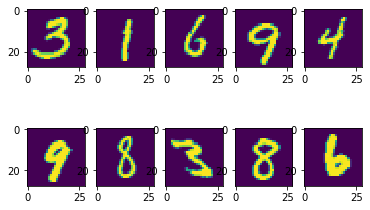

Predictions are tensor([3, 1, 6, 9, 4, 9, 8, 3, 8, 6])
True labels are tensor([3, 1, 6, 9, 4, 9, 8, 3, 8, 6])
test accuracy on this minibatch of size 10 is 100 % 


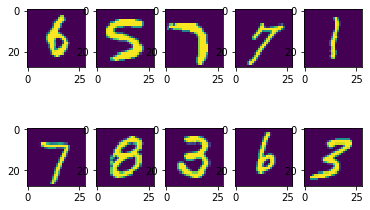

Predictions are tensor([6, 5, 7, 7, 1, 7, 8, 3, 6, 3])
True labels are tensor([6, 5, 7, 7, 1, 7, 8, 3, 6, 3])
test accuracy on this minibatch of size 10 is 100 % 


In [84]:
test_batch_size = 10
minitestloader = torch.utils.data.DataLoader(testset,
                                             batch_size=test_batch_size,
                                             shuffle=True)
running_loss = 0
running_test_loss = 0
u = 0

for images, labels in minitestloader:
    if u < 2:

        for i in range(test_batch_size):
            plt.subplot(2, test_batch_size / 2, i + 1)
            plt.imshow(images[i][0])
        send(plt, 11)
        plt.show()

        images = images.view(images.shape[0], -1)
        outputs = model(images)
        test_loss = criterion(outputs, labels)
        running_test_loss += test_loss.item()

        predictions = torch.argmax(outputs, 1)
        print('Predictions are', predictions)
        print('True labels are', labels)
        correct_test = predictions.eq(labels).sum().item()

        print('test accuracy on this minibatch of size %d is %.0f %% ' %
              (test_batch_size, 100 * correct_test / test_batch_size))
        send('test accuracy on this minibatch of size %d is %.0f %% ' %
              (test_batch_size, 100 * correct_test / test_batch_size),18)

        test_accuracy = 100 * correct_test / len(predictions)
        u = u + 1

The following function prints a few elements that can help understand what happens when using ```loss.backward()``` and ```optimizer.step()``` 

In [85]:
epochs = 1

u=0
for images, labels in trainloader:
    # Flatten MNIST images into a 784 long vector
    while u <2:
        print('\n Minibatch number', u,'\n')
        images = images.view(images.shape[0], -1)
        print('image shape is', images.shape)
        # Training pass

        optimizer.zero_grad()


        output = model(images)
        print('the output probabilities  for the first 2 images are', '\n', torch.exp(output[0:2, :]),2)
        print('the labels  for the first 2 images are', labels[0:2],'\n' )

        loss = criterion(output, labels)

        print('a few coefs of the model parameters are \n',  next(model.parameters())[0:3, 0:3],'\n')
        print('before backward step, the gradient of the loss wrt these few coefs of the model parameters are\n', next(model.parameters()).grad[0:3,0:3] ,'\n')

        loss.backward()
        print('after backward step, the gradient of the loss wrt these few coefs of the model parameters are\n', next(model.parameters()).grad[0:3,0:3],'\n')
        optimizer.step()
        print('after optimizer step, these coefs of the model parameters are\n', next(model.parameters())[0:3,0:3],'\n')
        running_loss += loss.item()
        u = u+1


 Minibatch number 0 

image shape is torch.Size([64, 784])
the output probabilities  for the first 2 images are 
 tensor([[1.7716e-09, 9.9443e-01, 2.7600e-04, 3.6861e-03, 4.5557e-06, 1.8359e-05,
         1.3663e-05, 3.0925e-04, 1.2375e-03, 2.7342e-05],
        [9.9245e-01, 1.8132e-10, 1.7720e-04, 6.3854e-07, 4.7091e-10, 7.3681e-03,
         5.8167e-06, 1.6186e-08, 7.4906e-07, 1.5802e-09]],
       grad_fn=<ExpBackward>) 2
the labels  for the first 2 images are tensor([1, 0]) 

a few coefs of the model parameters are 
 tensor([[-1.2942e-02, -2.1880e-02,  4.8812e-05],
        [ 2.8816e-02,  1.2430e-02, -1.6474e-02],
        [-6.4690e-03,  3.3533e-02,  3.5663e-02]], grad_fn=<SliceBackward>) 

before backward step, the gradient of the loss wrt these few coefs of the model parameters are
 tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]) 

after backward step, the gradient of the loss wrt these few coefs of the model parameters are
 tensor([[-0.0007, -0.0007, -0.0007],
    

## Analyzing the performance of the optimizer for the training

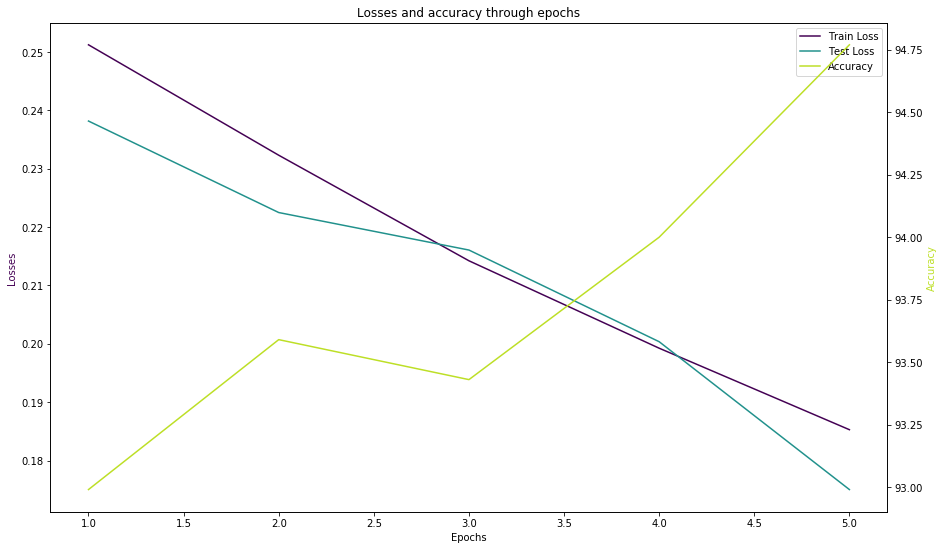

In [86]:
# Plot losses and accuracy curves of the first training through time

fig = plt.figure(figsize=(15, 9))
host = fig.add_subplot(111)
secondary = host.twinx()

host.set_xlabel("Epochs")
host.set_ylabel("Losses")
secondary.set_ylabel("Accuracy")

color1 = plt.cm.viridis(0)
color2 = plt.cm.viridis(0.5)
color3 = plt.cm.viridis(.9)

p1, = host.plot(np.arange(nb_epochs)+1, epoch_train_losses_list, color=color1, label="Train Loss")
p2, = host.plot(np.arange(nb_epochs)+1, epoch_test_losses_list, color=color2, label="Test Loss")
p3, = secondary.plot(np.arange(nb_epochs)+1, epoch_accuracy_list, color=color3, label="Accuracy")

lns = [p1, p2, p3]
host.legend(handles=lns, loc='best')

host.yaxis.label.set_color(p1.get_color())
secondary.yaxis.label.set_color(p3.get_color())

plt.title("Losses and accuracy through epochs")

send(plt, 12)

plt.show()

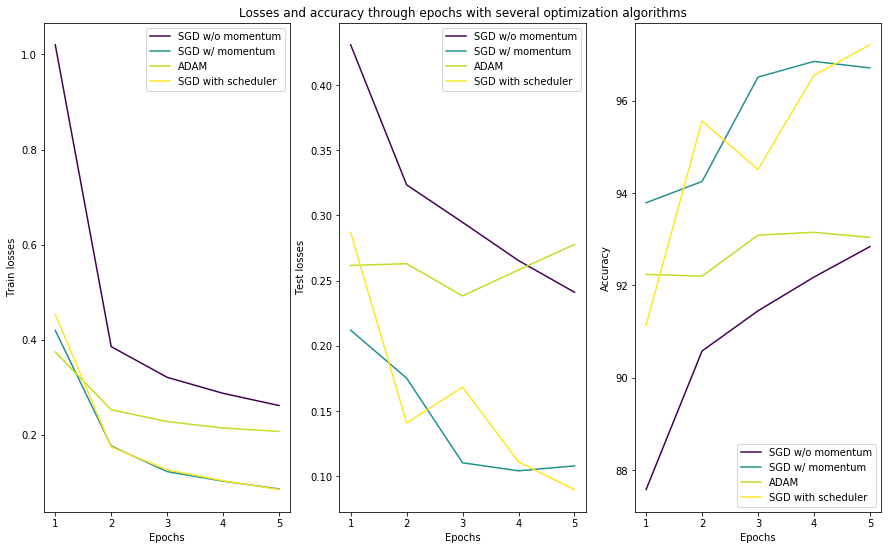

--- 251.66 seconds ---


In [87]:
# Compare several optimization algorithms performance

start_time = time.time()

# Training the same architecture with different losses
nb_epochs = 5

# SGD w/o momentum
epoch_train_losses_list1, epoch_test_losses_list1, epoch_accuracy_list1 = training(ReluNetwork(),
                                                                                   criterion=nn.NLLLoss(),
                                                                                   optim_alg="SGD",
                                                                                   lr=0.01,
                                                                                   momentum=(0.,),
                                                                                   schedule=False,
                                                                                   nb_epochs=nb_epochs,
                                                                                   intermediate_prints=False,
                                                                                  )

# SGD w/ momentum
epoch_train_losses_list2, epoch_test_losses_list2, epoch_accuracy_list2 = training(ReluNetwork(),
                                                                                   criterion=nn.NLLLoss(),
                                                                                   optim_alg="SGD",
                                                                                   lr=0.01,
                                                                                   momentum=(0.9,),
                                                                                   schedule=False,
                                                                                   nb_epochs=nb_epochs,
                                                                                   intermediate_prints=False,
                                                                                  )

# ADAM
epoch_train_losses_list3, epoch_test_losses_list3, epoch_accuracy_list3 = training(ReluNetwork(),
                                                                                   criterion=nn.NLLLoss(),
                                                                                   optim_alg="ADAM",
                                                                                   lr=0.01,
                                                                                   momentum=(0.9, 0.999),
                                                                                   schedule=False,
                                                                                   nb_epochs=nb_epochs,
                                                                                   intermediate_prints=False,
                                                                                  )

# SGD with scheduler
epoch_train_losses_list4, epoch_test_losses_list4, epoch_accuracy_list4 = training(ReluNetwork(),
                                                                                   criterion=nn.NLLLoss(),
                                                                                   optim_alg="SGD",
                                                                                   lr=0.1,
                                                                                   momentum=(0.,),
                                                                                   schedule=True,
                                                                                   nb_epochs=nb_epochs,
                                                                                   intermediate_prints=False,
                                                                                  )

# Plot curves
fig = plt.figure(figsize=(15, 9))

plt.subplot(1,3,1)
plt.plot(np.arange(nb_epochs)+1, epoch_train_losses_list1, color=plt.cm.viridis(0))
plt.plot(np.arange(nb_epochs)+1, epoch_train_losses_list2, color=plt.cm.viridis(0.5))
plt.plot(np.arange(nb_epochs)+1, epoch_train_losses_list3, color=plt.cm.viridis(.9))
plt.plot(np.arange(nb_epochs)+1, epoch_train_losses_list4, color=plt.cm.viridis(1.3))
plt.legend(["SGD w/o momentum", "SGD w/ momentum", "ADAM", "SGD with scheduler"])
plt.xlabel("Epochs")
plt.ylabel("Train losses")

plt.subplot(1,3,2)
plt.title("Losses and accuracy through epochs with several optimization algorithms")
plt.plot(np.arange(nb_epochs)+1, epoch_test_losses_list1, color=plt.cm.viridis(0))
plt.plot(np.arange(nb_epochs)+1, epoch_test_losses_list2, color=plt.cm.viridis(0.5))
plt.plot(np.arange(nb_epochs)+1, epoch_test_losses_list3, color=plt.cm.viridis(.9))
plt.plot(np.arange(nb_epochs)+1, epoch_test_losses_list4, color=plt.cm.viridis(1.3))
plt.legend(["SGD w/o momentum", "SGD w/ momentum", "ADAM", "SGD with scheduler"])
plt.xlabel("Epochs")
plt.ylabel("Test losses")

plt.subplot(1,3,3)
plt.plot(np.arange(nb_epochs)+1, epoch_accuracy_list1, color=plt.cm.viridis(0))
plt.plot(np.arange(nb_epochs)+1, epoch_accuracy_list2, color=plt.cm.viridis(0.5))
plt.plot(np.arange(nb_epochs)+1, epoch_accuracy_list3, color=plt.cm.viridis(.9))
plt.plot(np.arange(nb_epochs)+1, epoch_accuracy_list4, color=plt.cm.viridis(1.3))
plt.legend(["SGD w/o momentum", "SGD w/ momentum", "ADAM", "SGD with scheduler"])
plt.xlabel("Epochs")
plt.ylabel("Accuracy")

send(plt, 13)

plt.show()

print("--- %s seconds ---" % round((time.time() - start_time), 3))

# END TO DO
###############

In [88]:
# Please leave your feeling about those algorithms: Which one seems to perform best on this task?

send("I would prefer .... ??? ", 14)

<Response [200]>

**Why do you think we reinstantiated the model before each training?
Where/When the parameters are initialized?**

<a id='ML'></a>
## 1.4 - Train more classical ML algorithms

**8) Implement one or more classical ML methods (SVM, Logistic regression, boosting, RandomForest...) and compute their accuracy on the MNIST test set. Compare with Neural Networks.**

In [49]:
# Reload the training data
trainset = datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=True)
testset = datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=False)

import numpy as np

input_size = np.array(trainset[0][0]).shape[0] * np.array(trainset[0][0]).shape[1]
train_size = len(trainset)
test_size = len(testset)

X_train = np.zeros((train_size,input_size))
y_train = np.zeros(train_size)

X_test = np.zeros((test_size,input_size))
y_test = np.zeros(test_size)

for i in range(train_size):
    X_train[i] = np.ravel(trainset[i][0])
    y_train[i] = trainset[i][1]
    
for i in range(test_size):
    X_test[i] = np.ravel(testset[i][0])
    y_test[i] = testset[i][1]


In [51]:
######################
#Implement machine learning method. Warning: LogisticRegression and LinearSVC take a long time to run




from sklearn.ensemble import RandomForestClassifier
# TO DO
rfc = RandomForestClassifier(n_jobs=-1, n_estimators=10)
rfc.fit(X_train, y_train)
accuracy_rf = rfc.score(X_test, y_test)
# END TO DO 


from sklearn.ensemble import GradientBoostingClassifier
# TO DO
gbc = GradientBoostingClassifier(subsample=0.01, n_estimators=10)
gbc.fit(X_train, y_train)
accuracy_gb = gbc.score(X_test, y_test)
# END TO DO 

#Too long to run
#from sklearn.linear_model import LogisticRegression
#lr = LogisticRegression()
#lr.fit(X_train, y_train)
#accuracy_lr = lr.score(X_test, y_test)

# #Too long to run
#from sklearn.svm import LinearSVC
#svcl = LinearSVC()
#svcl.fit(X_train, y_train)
#accuracy_svc = svcl.score(X_test, y_test)

print("Random forest accuracy is %.3f" % accuracy_rf)
print("Gradient boosting accuracy is %.3f" % accuracy_gb) 
#print("Logistic regression accuracy is", round(accuracy_lr, 3))
#print("SVC accuracy is", round(accuracy_svc, 3))

######################

send("Random forest accuracy is %.1f %%" % (100*accuracy_rf), 15)
send("Gradient boosting accuracy is %.1f %%" % (100*accuracy_gb), 16)

Random forest accuracy is 0.948
Gradient boosting accuracy is 0.794


In [56]:
send("Random forest accuracy is %.1f %%" % (100*accuracy_rf), 17)
send("Gradient boosting accuracy is %.1f %%" % (100*accuracy_gb), 18) 

<Response [200]>

<a id='tabulardata'></a>
# 2. Tabular data - Housing Prices

We will now consider a real data set describing housing price. You can find the data here: https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data

<a id='LoadHousing'></a>
## 2.1 - Loading the data set

**9) Download the data using $\texttt{pandas}$ and create a train test (with the first 1200 lines) and a test set (with the remaining lines)**

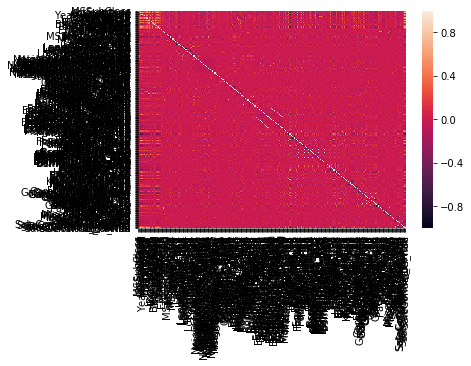

In [60]:
######################


import pandas
from sklearn import preprocessing
import seaborn as sns

#Import the csv file
df_housing = pandas.read_csv(r'housing/train.csv')

#Plot the first lines of the table to check that data have been correctly imported
# TO DO
df_housing.head() 
# END TO DO 

#Display the column names
# TO DO
df_housing.columns
# END TO DO 

#Univariate statistics
# TO DO
df_housing.describe()
# END TO DO 

#Encode all categorical variables into binary variables
# TO DO
df_housing = pandas.get_dummies(df_housing, dummy_na=True)
# END TO DO 

#Drop the column Id (unuseful to predict)
df_housing = df_housing.drop('Id', axis=1)

# Replace missing values by their mean (we could do better)
df_housing.fillna(df_housing.mean(), inplace=True)

#Put the target variable "SalePrice" in the last column of the dataset
u = df_housing.columns.tolist()
u.remove('SalePrice')
u.append('SalePrice')
df_housing = df_housing[u]

# plot the heatmap
corr = df_housing.corr()
plt.figure
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)
send(plt, 19)
plt.show()


#Rescale the data
scaler = preprocessing.StandardScaler().fit(df_housing[u])
df_housing[u]=scaler.transform(df_housing[u])    

#Store the standard deviation of the output (useful to compute the error of an estimate)
sigma = scaler.scale_[-1]

# Split the dataset into two parts and store them in a file

df_train = df_housing.iloc[range(1200),:]
df_train.to_csv("housing/new_train.csv", encoding='utf-8', index=False)

df_test = df_housing.iloc[1200:,:]
df_test.to_csv("housing/new_test.csv", encoding='utf-8', index=False)


######################

<a id='HousingNN'></a>
## 2.1 - Implement a Neural Network

**10) Change the data format so that it can be read by a neural network. Implement a neural network in Pytorch to predict the SalePrice. You can look at https://pytorch.org/tutorials/beginner/data_loading_tutorial.html  for more information about data loading in PyTorch**

In [58]:
######################

#Define a new class for the dataset

class Housing(Dataset):
    """Housing dataset."""

    def __init__(self, csv_file, root_dir, transform=None):
        """
        Args:
            csv_file (string): Path to the csv file with annotations.
            root_dir (string): Directory with all the images.
            transform (callable, optional): Optional transform to be applied
                on a sample.
        """
        self.housing_data = pandas.read_csv(csv_file)
        self.root_dir = root_dir
        self.transform = transform
        self.nb_inputs = self.housing_data.shape[1]-1
        #u.remove('SalePrice')      

    def __len__(self):
        return len(self.housing_data)

    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()

        inputs = self.housing_data.iloc[idx, range(self.nb_inputs)]
        targets = self.housing_data.iloc[idx, -1]
        targets = np.array([targets])
        targets = targets.astype('float').reshape(-1, 1)
        inputs = np.array([inputs])
        inputs = inputs.astype('float').reshape(-1, self.nb_inputs)
        sample = {'input': inputs, 'target': targets}

        if self.transform:
            sample = self.transform(sample)

        return sample

# Define the transformation used to turn arrays into Tensors, readable by a neural network

class ToTensor(object):
    """Convert ndarrays in sample to Tensors."""

    def __call__(self, sample):
        image, landmarks = sample['input'], sample['target']

        # swap color axis because
        # numpy image: H x W x C
        # torch image: C X H X W
        #image = image.transpose((2, 0, 1))
        #print(type(torch.from_numpy(landmarks).float()))
        return {'input': torch.from_numpy(image).float(),
                'target': torch.from_numpy(landmarks).float()}
    
######################

In [59]:
################

#Import the data

train_housing = Housing(csv_file='housing/new_train.csv', root_dir='housing', transform=transforms.Compose([ToTensor()]))
test_housing = Housing(csv_file='housing/new_test.csv', root_dir='housing', transform=transforms.Compose([ToTensor()]))

# Set the batch_size
batch_size = 4
trainloader = DataLoader(train_housing, batch_size=batch_size,shuffle=True)
testloader = DataLoader(test_housing, batch_size=batch_size,shuffle=True)

# You can access an item of train_housing by using train_housing.__getitem__(u)

#Number of inputs
n_inputs = train_housing[0]['input'].shape[1]

#Define the network architecture
model = nn.Sequential(nn.Linear(n_inputs, 100),
                      nn.ReLU(),
                      nn.Linear(100, 1))

# Define the loss
criterion = nn.MSELoss()

#Define the optimizer
optimizer = optim.SGD(model.parameters(), lr=0.003)

send(str([model, criterion, optimizer]), 20)
######################

<Response [200]>

In [63]:
################

#Run the neural network

start_time = time.time()

epochs = 15
for e in range(epochs):
    running_loss = 0
    running_test_loss=0
    for data in trainloader:
        # Flatten MNIST images into a 784 long vector
        #images = images.view(images.shape[0], -1)
        y = data['target']
        x = data['input']

        # Training pass
        optimizer.zero_grad()

        output = model(x)
        loss = criterion(output, y)
        #print('labels', y)
        #print('output', output)
        #print('input', x)

        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
    else:
      
        #Compute validation loss
        with torch.no_grad():
            for data in testloader:
                # Flatten MNIST images into a 784 long vector
                y = data['target']
                x = data['input']
                output = model(x)
                test_loss = criterion(output, y)
                running_test_loss += test_loss.item()
        
        sigma = scaler.scale_[-1]
        print("Epoch number", e+1)
        print("Training loss: ", round( sigma*np.sqrt(running_loss     /(batch_size*len(trainloader))),3)) 
        print("Test loss: ",     round( sigma*np.sqrt(running_test_loss/(batch_size*len(testloader))) ,3)) 

print("--- %s seconds ---" % round((time.time() - start_time), 3))

send(np.array([round( sigma*np.sqrt(running_loss     /(batch_size*len(trainloader))), 21)
               , round( sigma*np.sqrt(running_test_loss/(batch_size*len(testloader))) ,3)]),11)
######################

Epoch number 1
Training loss:  9819.768
Test loss:  23936.625
Epoch number 2
Training loss:  9478.504
Test loss:  24604.139
Epoch number 3
Training loss:  8972.57
Test loss:  23745.045
Epoch number 4
Training loss:  8714.896
Test loss:  24571.623
Epoch number 5
Training loss:  8420.125
Test loss:  24495.085
Epoch number 6
Training loss:  8123.057
Test loss:  24182.761
Epoch number 7
Training loss:  7979.184
Test loss:  24927.377
Epoch number 8
Training loss:  7699.48
Test loss:  25486.766
Epoch number 9
Training loss:  7457.18
Test loss:  26256.432
Epoch number 10
Training loss:  7293.061
Test loss:  25786.97
Epoch number 11
Training loss:  7000.034
Test loss:  25326.364
Epoch number 12
Training loss:  6861.754
Test loss:  26236.271
Epoch number 13
Training loss:  6678.155
Test loss:  25868.948
Epoch number 14
Training loss:  6557.667
Test loss:  26122.719
Epoch number 15
Training loss:  6358.042
Test loss:  25804.839
--- 14.617 seconds ---


<Response [200]>

<a id='HousingML'></a>
## 2.3 - Classical ML algorithms

**11) Train a random forest, a gradient boosting and a linear regression to predict the SalePrice. Comment.**

In [64]:
#######################

#Load the datasets

df_housing_train = pandas.read_csv(r'housing/new_train.csv')
df_housing_test = pandas.read_csv(r'housing/new_test.csv')

nb_inputs = df_housing_train.shape[1]
X_train = df_housing_train.iloc[:,range(nb_inputs)]
X_test = df_housing_test.iloc[:,range(nb_inputs)]

y_train = df_housing_train.iloc[:,-1]
y_test = df_housing_test.iloc[:,-1]

#########################

In [65]:
##########################

# Train and test the performance of the learning algorithms

import sklearn
from sklearn.metrics import mean_squared_error

# Run random forests algorithm
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_jobs=-1, n_estimators=10)
rfr.fit(X_train, y_train)
y_pred = rfr.predict(X_test)
rmse_rfr = sigma*np.sqrt(mean_squared_error(y_pred, y_test))

# Run boosting algorithm
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor()
gbr.fit(X_train, y_train)
y_pred = gbr.predict(X_test)
rmse_gbr = sigma*np.sqrt(mean_squared_error(y_pred, y_test))

from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
rmse_lr = sigma*np.sqrt(mean_squared_error(y_pred, y_test))

print("Random forest accuracy is", round(rmse_rfr, 0))
print("Gradient boosting accuracy is", round(rmse_gbr, 0))
print("Linear regression accuracy is", round(rmse_lr, 0))

send(np.array([round(rmse_rfr, 0), round(rmse_gbr, 0),  round(rmse_lr, 0)]), 22)
##########################

Random forest accuracy is 2835.0
Gradient boosting accuracy is 2768.0
Linear regression accuracy is 11.0


<Response [200]>

<a id='HousingKeras'></a>
## 2.4 - Keras



**11) Similarly, use keras to build a neural network prediction. Comment. You can use this documentation (https://keras.io/getting-started/sequential-model-guide/).**

Keras is a high-level API to build and train deep learning models. It's used for fast prototyping, advanced research, and production, with three key advantages:

- __User friendly__: Keras has a simple, consistent interface optimized for common use cases. It provides clear and actionable feedback for user errors.
- __Modular and composable__: Keras models are made by connecting configurable building blocks together, with few restrictions.
- __Easy to extend__: Write custom building blocks to express new ideas for research. Create new layers, loss functions, and develop state-of-the-art models.

In Keras, models are built by assymbling multiple layers.  Suppose we want to create a new multilayer perceptron model to categorize 128-feature data into 10 labeled categories.  The Keras code could look like:

```python
# Create a sequential model
model = keras.models.Sequential()
# Adds a densely-connected layer with 64 units to the model
model.add(layers.Dense(64, activation='relu'), input_shape=[128])
# Add another
model.add(layers.Dense(32, activation='relu'))
# Add a softmax layer with 10 output units
model.add(layers.Dense(10, activation='softmax'))
```

The `input_shape` argument must be given for the first layer in the model, however all other layers will automatically determine the input shape based on the previous layer in the model.  Note that the code above is substantially simpler than the corresponding TensorFlow code.  This is particular useful for building convolutional or other types of layers, as we will see.

Once built, a model's learning can be configured with the `compile()` function

```python
model.compile(
    loss='categorical_crossentropy', 
    optimizer=tf.train.AdamOptimizer(0.001), 
    metrics=['accuracy'])
```

In this case, a cross-entropy loss function is used with the ADAM optimization algorithm.  The `metrics` argument allows the model to keep track of a number of [training metrics](https://www.tensorflow.org/api_docs/python/tf/keras/metrics) during training.

Once configured, training is performed using the `fit()` function.

```python
model.fit(data, labels, epochs=10, batch_size=32)
```

The function takes an array-like (could be numpy array) of data and the corresponding target values, and performs the optimization of the learnable parameters in the model.  See the documentation for the [fit()](https://www.tensorflow.org/api_docs/python/tf/keras/models/Model#fit) function for more details.

Once trained, the model can be used to predict, using the `predict()` function. 

```python
prediction = model.predict(new_data)
```

In [66]:
import keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils
from keras.wrappers.scikit_learn import KerasClassifier

print("keras version %s (should be at least 0.12.1)" % keras.__version__)

import tensorflow as tf
print("Tensorflow version is ",tf.__version__)

Using TensorFlow backend.


keras version 2.2.4 (should be at least 0.12.1)
Tensorflow version is  1.13.1


In [67]:
from __future__ import absolute_import, division, print_function, unicode_literals
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

AttributeError: module 'tensorflow' has no attribute 'config'

In [69]:
#######################

import tensorflow as tf
import pandas as pd
from keras.models import Sequential

#Load the datasets

df_housing_train = pandas.read_csv(r'housing/new_train.csv')
df_housing_test = pandas.read_csv(r'housing/new_test.csv')

nb_inputs = df_housing_train.shape[1]
X_train = df_housing_train.iloc[:,range(nb_inputs)]
X_test = df_housing_test.iloc[:,range(nb_inputs)]

y_train = df_housing_train.iloc[:,-1]
y_test = df_housing_test.iloc[:,-1]

#Define model

model = Sequential()
model.add(Dense(50, input_dim=nb_inputs, kernel_initializer="normal", activation='relu'))
model.add(Dense(1,  kernel_initializer="normal", activation='linear'))

# Compile model
model.compile(loss='mse', optimizer='adam', metrics=['mse'])

#Learning step 
model.fit(X_train, y_train, epochs=5, batch_size=100, verbose=2)

# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("The accuracy of One-layer Neural Network is", sigma*np.sqrt(scores[1]))


#########################

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Epoch 1/5
 - 1s - loss: 0.6921 - mean_squared_error: 0.6921
Epoch 2/5
 - 0s - loss: 0.2961 - mean_squared_error: 0.2961
Epoch 3/5
 - 0s - loss: 0.1917 - mean_squared_error: 0.1917
Epoch 4/5
 - 0s - loss: 0.1311 - mean_squared_error: 0.1311
Epoch 5/5
 - 0s - loss: 0.1029 - mean_squared_error: 0.1029
The accuracy of One-layer Neural Network is 41747.00315737704
